In [1]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/andonians/random-linear-regression")

Skipping, found downloaded files in ".\random-linear-regression" (use force=True to force download)


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,root_mean_squared_error


In [3]:
train_data =  pd.read_csv("random-linear-regression/train.csv")
test_data = pd.read_csv("random-linear-regression/test.csv")

In [4]:
train_data.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [5]:
train_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [6]:
test_data.info()

<class 'pandas.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [13]:
#sanitaton test
def sanitization_test(df):
    print("Null values:")
    print(df.isnull().sum(), "\n")

    print("Duplicate rows:", df.duplicated().sum(), "\n")

    obj = df.select_dtypes(include="object")
    cleaned = obj.apply(lambda c: c.str.strip().str.lower())

    print("Invalid strings:")
    print(cleaned.isin(["na", "nan", ""]).sum())



sanitization_test(train_data)
sanitization_test(test_data)

Null values:
x    0
y    1
dtype: int64 

Duplicate rows: 0 

Invalid strings:
Series([], dtype: float64)
Null values:
x    0
y    0
dtype: int64 

Duplicate rows: 0 

Invalid strings:
Series([], dtype: float64)


In [20]:
train_data = train_data.dropna()
sanitization_test(train_data)

Null values:
x    0
y    0
dtype: int64 

Duplicate rows: 0 

Invalid strings:
Series([], dtype: float64)


In [21]:
regressor = LinearRegression()

In [22]:
train_x = train_data["x"].to_numpy()
train_y = train_data["y"].to_numpy()

test_x = test_data["x"].to_numpy()
test_y = test_data["y"].to_numpy()

print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(699,) (699,)
(300,) (300,)


In [23]:
train_x=train_x.reshape(-1,1)
train_y=train_y.reshape(-1,1)
test_x=test_x.reshape(-1,1)
test_y=test_y.reshape(-1,1)


In [24]:
print(train_x.shape, train_y.shape)
print(test_x.shape, test_y.shape)

(699, 1) (699, 1)
(300, 1) (300, 1)


In [25]:
regressor.fit(train_x, train_y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [26]:
w = regressor.coef_
b = regressor.intercept_
print(f"The equation of the line is: y = {w}x + {b}")

The equation of the line is: y = [[1.00065638]]x + [-0.10726546]


In [29]:
y_pred = regressor.predict(test_x)
print(y_pred)

[[76.94327594]
 [20.90651855]
 [21.90717494]
 [19.90586217]
 [35.91636428]
 [14.90258026]
 [61.93343021]
 [94.95509081]
 [19.90586217]
 [ 4.89601644]
 [ 3.89536006]
 [18.90520579]
 [95.95574719]
 [61.93343021]
 [35.91636428]
 [14.90258026]
 [64.93539936]
 [13.90192388]
 [86.94983976]
 [68.93802488]
 [88.95115252]
 [50.92621001]
 [88.95115252]
 [26.91045685]
 [96.95640358]
 [57.93080468]
 [78.9445887 ]
 [20.90651855]
 [92.95377805]
 [26.91045685]
 [98.95771634]
 [30.91308237]
 [32.91439514]
 [79.94524508]
 [27.91111323]
 [46.92358448]
 [52.92752277]
 [68.93802488]
 [27.91111323]
 [32.91439514]
 [90.95246528]
 [70.93933765]
 [49.92555363]
 [75.94261956]
 [ 3.89536006]
 [36.91702066]
 [69.93868127]
 [67.9373685 ]
 [39.91898981]
 [34.9157079 ]
 [93.95443443]
 [87.95049614]
 [51.92686639]
 [30.91308237]
 [58.93146107]
 [-0.10726546]
 [38.91833343]
 [63.93474297]
 [68.93802488]
 [56.9301483 ]
 [12.9012675 ]
 [71.93999403]
 [75.94261956]
 [60.93277383]
 [81.94655785]
 [17.90454941]
 [40.91964

In [34]:
#Evalutaion Metrics

mae = mean_absolute_error(test_y, y_pred)
mse = mean_squared_error(test_y, y_pred)
rmse = root_mean_squared_error(test_y, y_pred)
r2 = r2_score(test_y, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2: {r2}")


MAE: 2.4157718500412595
MSE: 9.432922192039317
RMSE: 3.0713062680298293
R2: 0.9888014444327563


mae = 2.41 means on average the model is wrong by 2.41

mse = 9.43 penalizes large error and it tells is deviated by 9.43 

rmse = 3.07 means predictions are roughly 3.07 units of on average

r2 = 0.9888 means model is explaining 98.88% of the variance


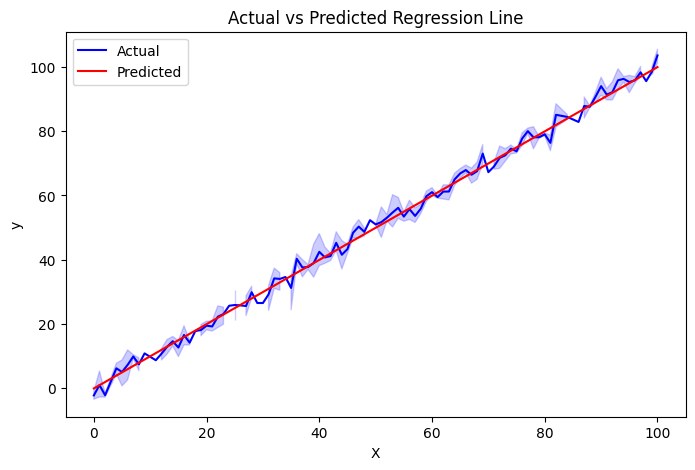

In [54]:
plt.figure(figsize=(8,5))
sns.lineplot(x=test_x.ravel(), y=test_y.ravel(), color='blue', label='Actual')
sns.lineplot(x=test_x.ravel(), y=y_pred.ravel(), color='red', label='Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Actual vs Predicted Regression Line')
plt.legend()
plt.show()